In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset_train = pd.read_csv('train.csv')
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,05-11-04,88.00,88.00,70.00,75.55,75.55,232535736,170036.32
1,08-11-04,76.80,78.60,75.00,75.15,75.20,68865277,52940.24
2,09-11-04,75.10,76.10,74.55,75.25,75.30,37460886,28202.36
3,10-11-04,75.50,75.95,75.00,75.05,75.05,17413433,13115.85
4,11-11-04,75.35,75.40,74.30,74.60,74.45,15961426,11930.37


In [5]:
training_set = dataset_train.iloc[:, 5:6].values
print(training_set)

[[ 75.55]
 [ 75.2 ]
 [ 75.3 ]
 ...
 [158.9 ]
 [157.6 ]
 [157.45]]


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(60, 2000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 1, batch_size = 32)


Epoch 1/1
1940/1940 [==============================] - 7s 3ms/step - loss: 0.0155


In [10]:
dataset_test = pd.read_csv('test2.csv')
real_stock_price = dataset_test.iloc[:, 5:6].values

In [48]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis =0)
print(dataset_total)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
#print(inputs)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 760) :
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

0       75.55
1       75.20
2       75.30
3       75.05
4       74.45
        ...  
696    120.90
697    119.25
698    119.65
699    125.90
700    126.85
Name: Close, Length: 2735, dtype: float64


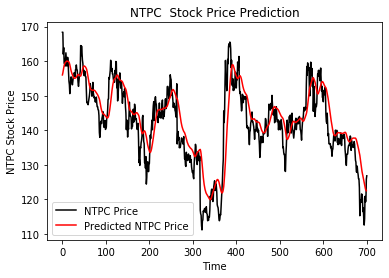

In [41]:
plt.plot(real_stock_price, color = 'black', label = 'NTPC Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted NTPC Price')
plt.title('NTPC  Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NTPC Stock Price')
plt.legend()
plt.show()

In [30]:
dataset_test1 = pd.read_csv('test1.csv')

In [14]:
inputt=[]
inputt=dataset_test1['Close'].values
inputt = inputt.reshape(-1,1)

In [15]:
inputt.shape

(64, 1)

In [16]:
inputt = sc.transform(inputt)
X_test1 = []
for i in range(60, 61) :
    X_test1.append(inputt[i-60:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
predicted_stock_price1 = regressor.predict(X_test1)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

In [17]:
print(predicted_stock_price1)

[[144.8065]]


In [50]:
print('hello world')

hello world
